In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


In [4]:
df.columns

Index(['id', 'name', 'artists', 'duration_ms', 'release_date', 'year',
       'acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode',
       'key', 'popularity', 'explicit'],
      dtype='object')

In [5]:
df = df.drop(['duration_ms', 'release_date','liveness'], axis=1)
df.head()

,id,name,artists,year,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],1928,0.995,0.708,0.1950,0.563,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",1928,0.994,0.379,0.0135,0.901,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],1928,0.604,0.749,0.2200,0.000,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],1928,0.995,0.781,0.1300,0.887,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",1928,0.990,0.210,0.2040,0.908,-16.829,0.0424,62.149,0.0693,1,11,1,0


In [6]:
df[df.duplicated()].size

0

In [7]:
df.shape

(169909, 16)

In [8]:
df.isna().sum()

id                  0
name                0
artists             0
year                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
loudness            0
speechiness         0
tempo               0
valence             0
mode                0
key                 0
popularity          0
explicit            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169909 non-null  object 
 1   name              169909 non-null  object 
 2   artists           169909 non-null  object 
 3   year              169909 non-null  int64  
 4   acousticness      169909 non-null  float64
 5   danceability      169909 non-null  float64
 6   energy            169909 non-null  float64
 7   instrumentalness  169909 non-null  float64
 8   loudness          169909 non-null  float64
 9   speechiness       169909 non-null  float64
 10  tempo             169909 non-null  float64
 11  valence           169909 non-null  float64
 12  mode              169909 non-null  int64  
 13  key               169909 non-null  int64  
 14  popularity        169909 non-null  int64  
 15  explicit          169909 non-null  int64  
dtypes: float64(8), int64

In [29]:
print(f"Possible values for mode : {df['mode'].unique()}")
print(f"Possible values for key : {df['key'].unique()}")
print(f"Possible values for explicit : {df['explicit'].unique()}")

Possible values for mode : [1 0]
Possible values for key : [10  8  5  1 11  6  9  7  4  2  3  0]
Possible values for explicit : [0 1]


In [30]:
attributes = ['year','popularity']

for attr in attributes:
    attr_range = f"{df[attr].min()} – {df[attr].max()}"
    print(f"Range for {attr}: {attr_range}")

Range for year: 1921 – 2020
Range for popularity: 0 – 100


In [31]:
#print(df['year'].value_counts().sort_index().to_string())
print(df['year'].value_counts().sort_index())

1921     128
1922      72
1923     169
1924     237
1925     263
        ... 
2016    1969
2017    2000
2018    2000
2019    2000
2020    1756
Name: year, Length: 100, dtype: int64


In [32]:
from sklearn.cluster import KMeans

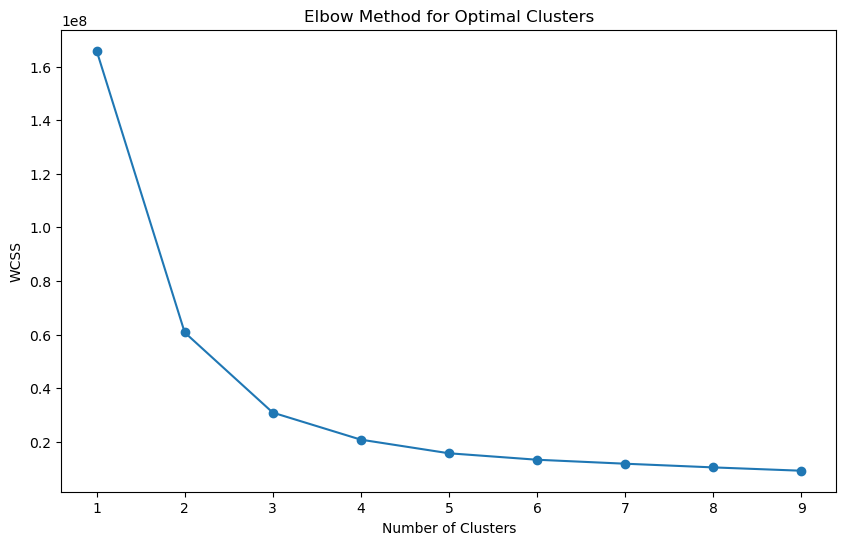

In [33]:
X = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo', 'valence']]

wcss = []
cluster_range = range(1, 10)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=12)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [34]:
kmeans = KMeans(n_clusters=5, random_state=1)
clusters = kmeans.fit_predict(X)
df2 = df.copy()
df2["cluster"] = clusters
df2.head()

,id,name,artists,year,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,cluster
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],1928,0.995,0.708,0.1950,0.563,-12.428,0.0506,118.469,0.7790,1,10,0,0,1
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",1928,0.994,0.379,0.0135,0.901,-28.454,0.0462,83.972,0.0767,1,8,0,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],1928,0.604,0.749,0.2200,0.000,-19.924,0.9290,107.177,0.8800,0,5,0,0,2
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],1928,0.995,0.781,0.1300,0.887,-14.734,0.0926,108.003,0.7200,0,1,0,0,2
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",1928,0.990,0.210,0.2040,0.908,-16.829,0.0424,62.149,0.0693,1,11,1,0,0


In [35]:
df2['cluster'].value_counts().sort_index()

0    31887
1    45706
2    42639
3    18725
4    30952
Name: cluster, dtype: int64

In [36]:
cluster_df = df2.groupby("cluster").agg("mean")
cluster_df["count"] = df2.groupby("cluster").size()
cluster_df = cluster_df[["count", "acousticness", "danceability", "energy", "instrumentalness", "loudness", "speechiness", "tempo", "valence"]]
cluster_df

C:\Users\khushi\AppData\Local\Temp\ipykernel_6068\3649566496.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_df = df2.groupby("cluster").agg("mean")


,count,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
cluster,,,,,,,,,
0,31887,0.683268,0.452751,0.325381,0.250263,-14.345837,0.113264,77.160509,0.407619
1,45706,0.465878,0.601225,0.513503,0.151661,-10.894305,0.082832,120.537407,0.577040
2,42639,0.475427,0.574924,0.504582,0.140832,-11.010153,0.091349,98.652184,0.545909
3,18725,0.413663,0.451680,0.561672,0.125392,-10.073610,0.116644,175.739454,0.570237
4,30952,0.410415,0.534639,0.553715,0.137300,-10.288298,0.080915,142.274136,0.551859


In [37]:
cluster_df.to_csv('clusters.csv')

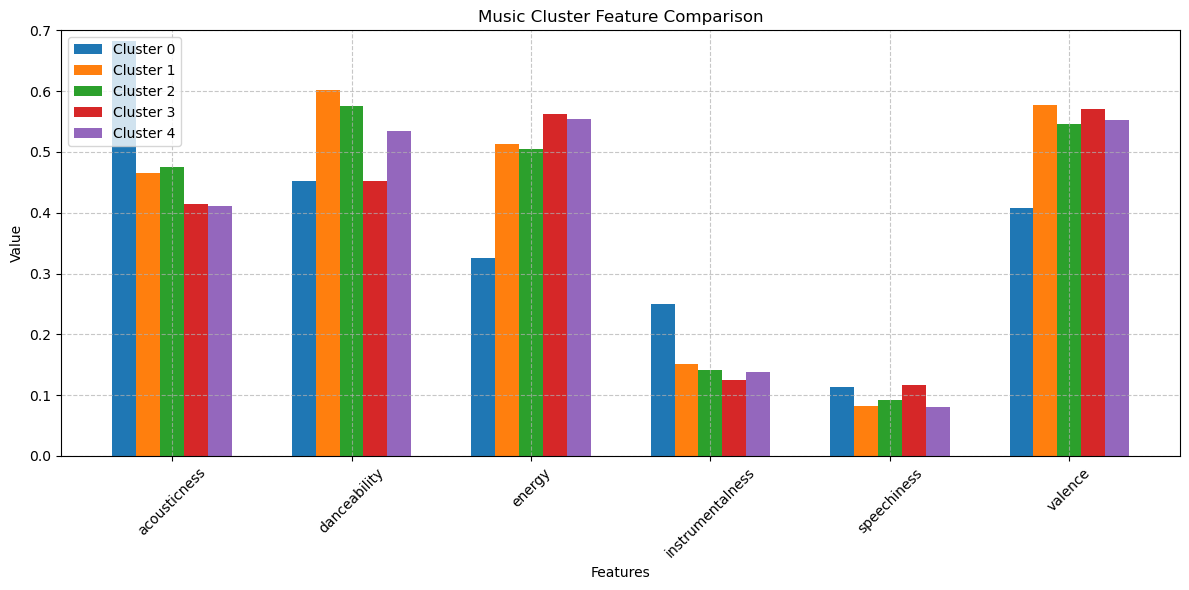

In [38]:
import numpy as np
import matplotlib.pyplot as plt

features = ["acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence"]
plot_data = cluster_df[features]

plt.figure(figsize=(12, 6))
x = np.arange(0, len(features) * 1.5, 1.5)
width = 0.2

for i in range(len(plot_data)):
    values = plot_data.iloc[i]
    plt.bar(x + i * width, values, width, label=f'Cluster {i}')

plt.xlabel('Features')
plt.ylabel('Value')
plt.title('Music Cluster Feature Comparison')
plt.xticks(x + width * (len(plot_data) - 1) / 2, features, rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.ylim(0, 0.7)
plt.tight_layout()
plt.show()


# Cluster Analysis

## Cluster 0: Acoustic/Folk
- Highest acousticness and lowest energy.
- Slowest tempo (77 BPM) and quietest songs.
- Low valence suggests more melancholic or serious themes.
- These features strongly align with folk music, acoustic singer-songwriter, and traditional acoustic genres.

## Cluster 1: Upbeat Pop
- Highest danceability with moderate energy.
- Optimal tempo for dancing (121 BPM).
- High valence (positive emotional tone).
- Balanced features make this ideal for commercial pop music.
- Largest cluster (45,706 songs) suggests widespread appeal.

## Cluster 2: Alternative/Indie
- Balanced mix of acoustic and electronic elements.
- Moderate tempo and energy levels.
- Neither too experimental nor too conventional.
- Features suggest the middle-ground approach common in alternative/indie music.
- Second-largest cluster (42,639 songs) indicating significant popularity.

## Cluster 3: Electronic/EDM
- Extremely high tempo (176 BPM).
- High energy and loudness.
- Higher speechiness could indicate electronic music with vocal samples.
- Smallest cluster (18,725 songs) suggests more niche appeal.
- Features typical of electronic dance music (EDM) and its subgenres.

## Cluster 4: Rock/Metal
- High energy with fast tempo.
- Low acousticness but not as electronic as Cluster 3.
- Balanced valence suggests a mix of positive and negative themes.
- Features align with contemporary rock production styles.


In [39]:
cluster_to_genre = {
    0: 'Acoustic/Folk',
    1: 'Upbeat Pop',
    2: 'Alternative/Indie',
    3: 'Electronic/EDM',
    4: 'Rock/Metal'
}
genre_df = df2.copy()
genre_df['genre'] = genre_df['cluster'].map(cluster_to_genre)
genre_df = genre_df.drop(columns='cluster')

genre_df.head()

,id,name,artists,year,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,genre
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],1928,0.995,0.708,0.1950,0.563,-12.428,0.0506,118.469,0.7790,1,10,0,0,Upbeat Pop
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",1928,0.994,0.379,0.0135,0.901,-28.454,0.0462,83.972,0.0767,1,8,0,0,Acoustic/Folk
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],1928,0.604,0.749,0.2200,0.000,-19.924,0.9290,107.177,0.8800,0,5,0,0,Alternative/Indie
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],1928,0.995,0.781,0.1300,0.887,-14.734,0.0926,108.003,0.7200,0,1,0,0,Alternative/Indie
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",1928,0.990,0.210,0.2040,0.908,-16.829,0.0424,62.149,0.0693,1,11,1,0,Acoustic/Folk


In [40]:
genre_df.to_csv("data_with_genres.csv",index=False)